# 스피어만 상관분석

스피어만 상관계수는 두 변수 간의 순위 순서를 기반으로 상관관계를 측정

순위 데이터 또는 서열 데이터에서 사용되며, 정확한 값보다 상대적인 순위가 중요한 경우에 사용

값 자체보다는 값의 상대적인 순위가 중요

> 자동차 성능 순위나 음악 차트 등의 데이터 유형

피어슨 상관계수보다는 이상치에 강건하며, 비선형적인 관계도 잘 캡처할 수 있음.

값의 범위는 -1에서 1까지이며, 피어슨 상관계수와 마찬가지로 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 의미하며, 0에 가까울수록 상관관계가 없음을 의미함

> 아래 예제의 모든 데이터셋은 정규성과 등분산성을 충족한다고 가정한다.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from scipy.stats import spearmanr

### [2] 데이터 가져오기

In [2]:
origin = read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/mtcars.xlsx')
origin.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### [3] 그래프 초기화

In [3]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

## #02. 데이터 전처리

종속변수(`mpg`)와 서열 척도에 해당하는 변수들을 추출함

In [11]:
df = origin[['mpg','vs','am', 'gear', 'carb']]
df.head()

,mpg,vs,am,gear,carb
0,21.0,0,1,4,4
1,21.0,0,1,4,4
2,22.8,1,1,4,1
3,21.4,1,0,3,1
4,18.7,0,0,3,2


## #03. 산점도 행렬 시각화

서열 순위에 따라 데이터가 몰려 있기 때문에 파악이 쉽지 않다.

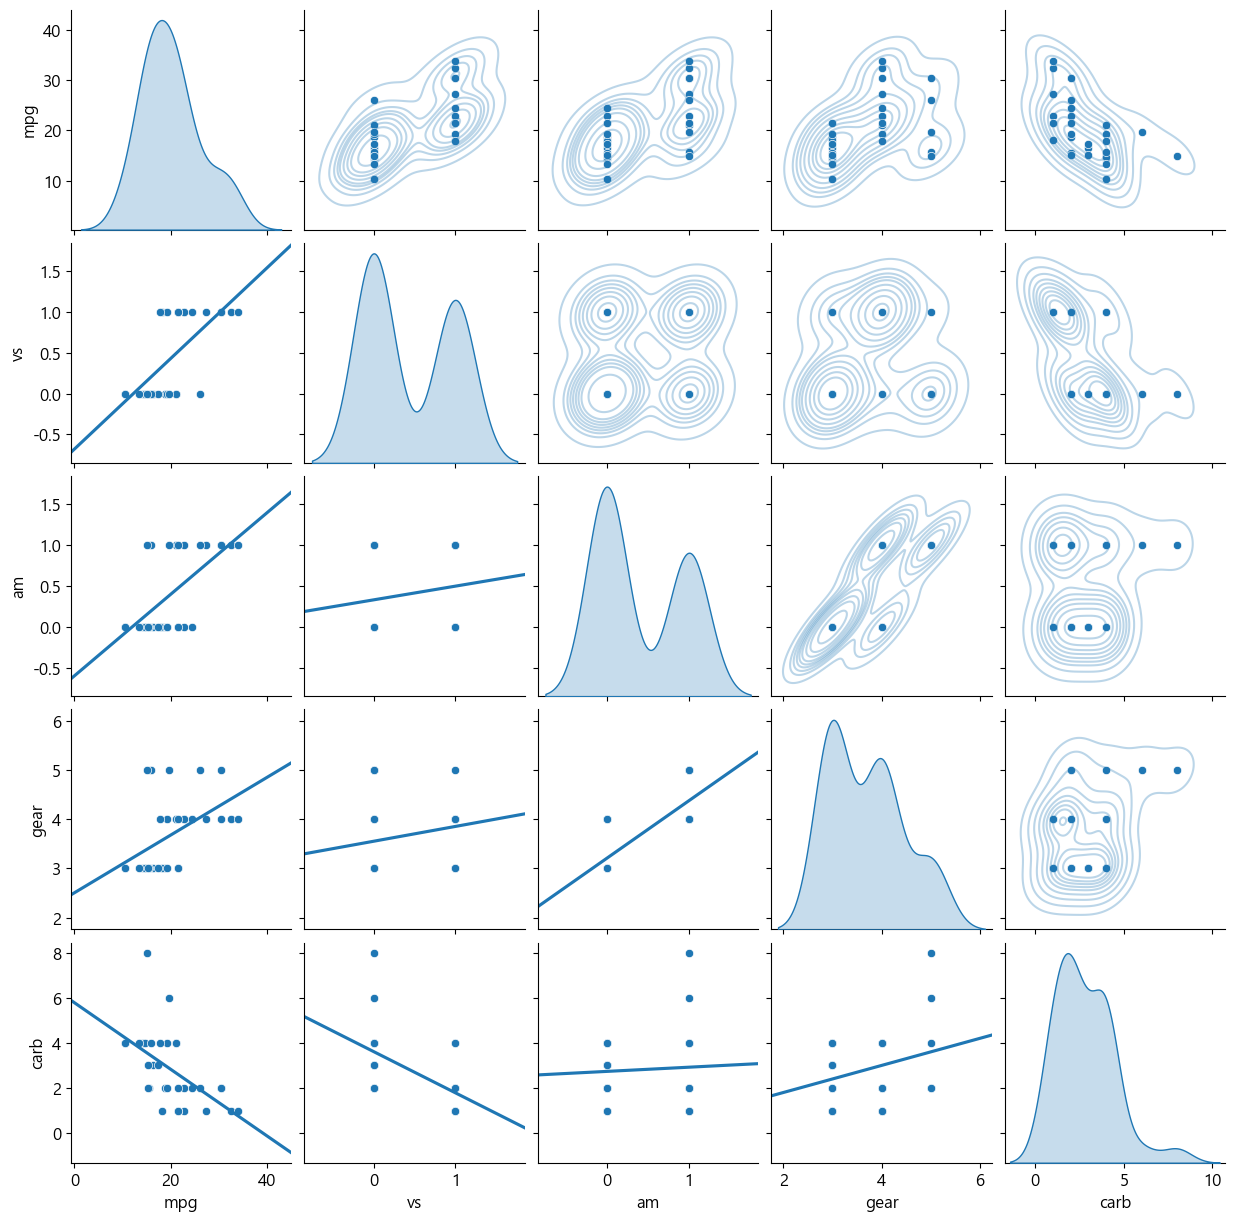

In [12]:
g = sb.pairplot(df, diag_kind='kde', palette='pastel')

g.map_upper(sb.kdeplot, alpha = 0.3)
g.map_lower(sb.regplot, scatter=False, truncate = False, ci = False)

plt.show()
plt.close()



## #04. 스피어만 상관분석

### [1] 상관계수 구하기

#### (1) 산점도 행렬

`method='spearman'`을 설정한다.

In [13]:
corr = df.corr(method='spearman')
corr

,mpg,vs,am,gear,carb
mpg,1.000000,0.706597,0.562006,0.542782,-0.657498
vs,0.706597,1.000000,0.168345,0.282662,-0.633695
am,0.562006,0.168345,1.000000,0.807688,-0.064365
gear,0.542782,0.282662,0.807688,1.000000,0.114887
carb,-0.657498,-0.633695,-0.064365,0.114887,1.000000


#### (2) 산점도 행렬 시각화

앞에서 구한 산점도 행렬을 활용한다.

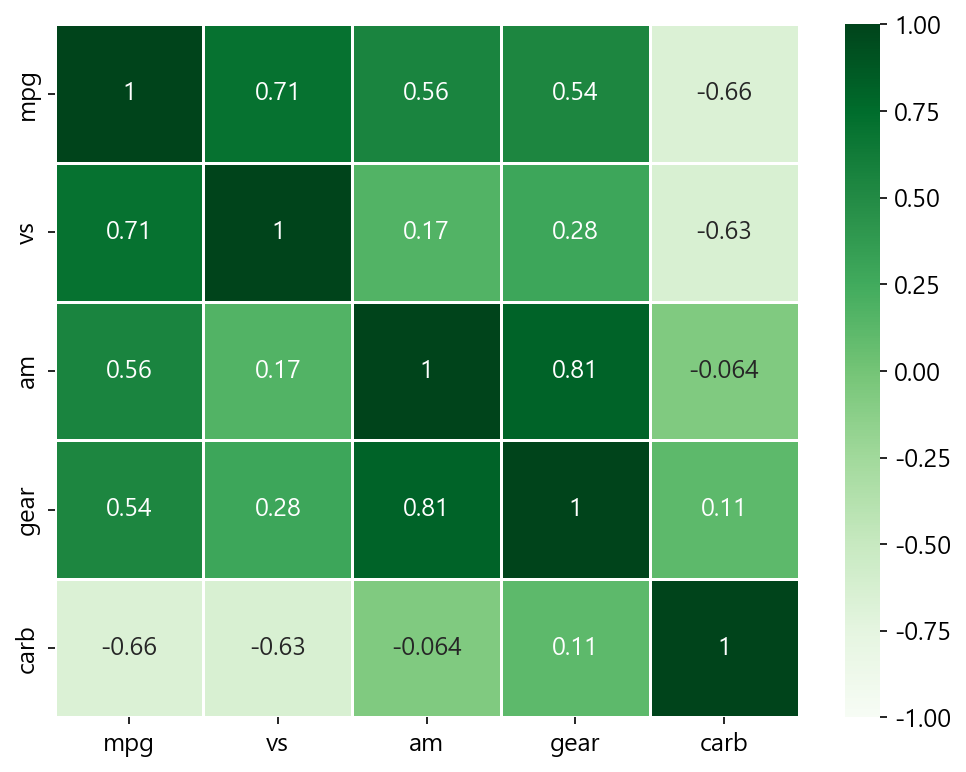

In [14]:
plt.figure(figsize=(8,6), dpi = 150)
sb.heatmap(corr, annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=0.5)
plt.show()
plt.close()

### [2] 결과 검정

In [15]:
names = df.columns
n = len(names)
pv = 0.05

data = []

for i in range(0,n):
    j = i + 1 if i < n -1 else 0
    fields = names[i] + ' vs ' + names[j]
    s, p = spearmanr(df[names[i]], df[names[j]])
    result = p <= pv

    data.append({'fields': fields, 'statistic': s, 'p-value': p, 'result': result})

rdf = DataFrame(data)
rdf.set_index('fields',inplace=True)
rdf

,statistic,p-value,result
fields,,,
mpg vs vs,0.706597,6.191450e-06,True
vs vs am,0.168345,3.570439e-01,False
am vs gear,0.807688,2.304063e-08,True
gear vs carb,0.114887,5.312358e-01,False
carb vs mpg,-0.657498,4.337570e-05,True
